In [1]:
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.

################### Next
#####################
#Steps for xc erosion
#1. set Umax position
#2. set energy slope
#3. calc Umax
#4. calc VGrad
#5. calc phi (two diff defs?)
#6. calc T_b
#7. adjust T_b onto bed normal vector using angles alpha and phi (maybe can do this from beginning with Vgrad)
#8. calculate erosion rates
#9. avg ersion rate for transport
#10. redraw xc

%pylab inline
from crossSection import CrossSection
from ShapeGen import genCirc, genEll
x, y = genCirc(1.,n=1000)
this_xc = CrossSection(x,y)
this_fd = 1.8001
#this_xc.calcA()
this_xc.setMaxVelPoint(this_fd)
h1=1.
h2=0.5
L=1000
E_slope = (h1-h2)/L 
this_xc.setEnergySlope(E_slope)
this_xc.calcUmax(1.0)
T_b=this_xc.calcT_b()
dr = 0.1*T_b**0.5
this_xc.erode(dr, resample=True)

eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)

Populating the interactive namespace from numpy and matplotlib


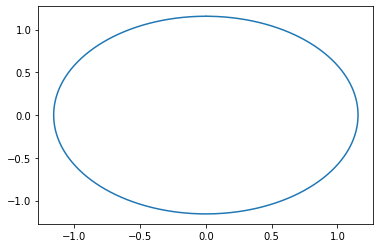

In [18]:
plot(this_xc.x,this_xc.y)

In [5]:

F_xc = D_Ca/eps*(0.001)*L_per_m3
np.sum(F_xc*this_xc.wet_ls)/this_xc.wet_ls.sum()

8.237155104729903e-05

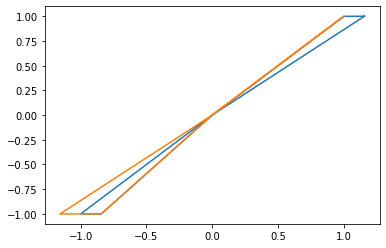

In [6]:
theta = np.arctan2(this_xc.xp-this_xc.xm, this_xc.yp-this_xc.ym)
plot(this_xc.x,cos(theta))
plot(this_xc.y,-sin(theta))


In [ ]:
np.arctan2()